In [1]:
#Dataset used: CSE-CIC-EDS2018: https://registry.opendata.aws/cse-cic-ids2018
#Documentation: https://www.unb.ca/cic/datasets/ids-2018.html
#Taken from this kaggle https://www.kaggle.com/datasets/dhoogla/csecicids2018?resource=download
#Feature extracton done using https://github.com/ahlashkari/CICFlowMeter

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(12345)


In [3]:
df = pd.read_parquet('../data/Web1-Thursday-22-02-2018_TrafficForML_CICFlowMeter.parquet')

In [4]:
df['Label'].value_counts(normalize=False)

Label
Benign              829883
Brute Force -Web       228
Brute Force -XSS        79
SQL Injection           34
Name: count, dtype: int64

In [5]:
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,20553406,10,7,1063,1297,744,0,106.300003,239.357498,...,20,1027304.0,0.0,1027304,1027304,19526080.0,0.0,19526080,19526080,Benign
1,6,790,2,0,848,0,848,0,424.000000,599.626526,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,17,99745913,5,0,2500,0,500,500,500.000000,0.000000,...,8,4000203.0,0.0,4000203,4000203,31915236.0,37927868.0,75584115,7200679,Benign
3,17,99745913,5,0,2500,0,500,500,500.000000,0.000000,...,8,4000189.0,0.0,4000189,4000189,31915242.0,37927876.0,75584130,7200693,Benign
4,17,89481361,6,0,3000,0,500,500,500.000000,0.000000,...,8,4000554.0,0.0,4000554,4000554,21370202.0,15281093.0,41990741,7200848,Benign


In [6]:
df.tail()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
830219,17,13512,1,1,36,52,36,36,36.0,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
830220,17,61898,2,2,78,254,39,39,39.0,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
830221,6,86213373,2,0,0,0,0,0,0.0,0.000000,...,20,0.0,0.0,0,0,86213376.0,0.0,86213373,86213373,Benign
830222,17,78472,1,1,32,121,32,32,32.0,0.000000,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
830223,6,2013403,8,7,1144,1581,677,0,143.0,227.969925,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [7]:
df.shape

(830224, 78)

In [8]:
df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830224 entries, 0 to 830223
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Protocol                  830224 non-null  int8    
 1   Flow Duration             830224 non-null  int64   
 2   Total Fwd Packets         830224 non-null  int16   
 3   Total Backward Packets    830224 non-null  int32   
 4   Fwd Packets Length Total  830224 non-null  int32   
 5   Bwd Packets Length Total  830224 non-null  int32   
 6   Fwd Packet Length Max     830224 non-null  int16   
 7   Fwd Packet Length Min     830224 non-null  int16   
 8   Fwd Packet Length Mean    830224 non-null  float32 
 9   Fwd Packet Length Std     830224 non-null  float32 
 10  Bwd Packet Length Max     830224 non-null  int16   
 11  Bwd Packet Length Min     830224 non-null  int16   
 12  Bwd Packet Length Mean    830224 non-null  float32 
 13  Bwd Packet Length Std     830

In [10]:
df.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,830224.000000,8.302240e+05,830224.000000,830224.000000,8.302240e+05,8.302240e+05,830224.000000,830224.000000,830224.000000,830224.000000,...,830224.000000,830224.000000,8.302240e+05,8.302240e+05,8.302240e+05,8.302240e+05,8.302240e+05,8.302240e+05,8.302240e+05,8.302240e+05
mean,8.773177,1.879420e+07,7.642905,10.251106,4.984931e+02,9.267840e+03,218.720116,11.704853,52.250435,68.691551,...,2.753829,16.517036,7.740466e+04,3.739384e+04,1.411507e+05,5.692484e+04,1.473275e+07,2.002687e+06,1.830502e+07,1.198572e+07
std,4.975787,1.658165e+09,80.128997,228.761679,5.581896e+03,3.324129e+05,286.158421,29.068457,57.221962,92.129837,...,5.713647,5.824445,6.916039e+05,2.819888e+05,9.096873e+05,6.614489e+05,9.902840e+08,6.126369e+08,2.171687e+09,2.734485e+08
min,0.000000,-8.282200e+11,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000,7.095250e+03,2.000000,1.000000,3.100000e+01,0.000000e+00,30.000000,0.000000,10.333333,0.000000,...,0.000000,8.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000,1.650376e+06,3.000000,2.000000,7.700000e+01,1.980000e+02,48.000000,0.000000,40.000000,10.662852,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,17.000000,3.071523e+07,9.000000,7.000000,7.530000e+02,1.581000e+03,423.000000,30.000000,72.000000,111.817543,...,5.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,17.000000,1.200000e+08,11478.000000,38418.000000,3.982514e+06,5.606950e+07,3804.000000,1460.000000,1808.419067,1032.375854,...,2754.000000,44.000000,1.084622e+08,6.357531e+07,1.084622e+08,1.084622e+08,3.955714e+11,2.622479e+11,9.684340e+11,2.399340e+11


In [11]:
df.dtypes

Protocol                        int8
Flow Duration                  int64
Total Fwd Packets              int16
Total Backward Packets         int32
Fwd Packets Length Total       int32
                              ...   
Idle Mean                    float32
Idle Std                     float32
Idle Max                       int64
Idle Min                       int64
Label                       category
Length: 78, dtype: object

In [12]:
df.isnull().sum()

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Label                       0
Length: 78, dtype: int64

In [13]:
df['Label'].value_counts(normalize=False)

Label
Benign              829883
Brute Force -Web       228
Brute Force -XSS        79
SQL Injection           34
Name: count, dtype: int64

In [14]:
df['Protocol'].value_counts()

Protocol
6     596465
17    217936
0      15823
Name: count, dtype: int64

In [15]:
df['label_binary'] = df['Label'].map({'Benign':0, 'Brute Force -Web':1,'Brute Force -XSS':1,'SQL Injection':1})

In [16]:
df.groupby('Label', observed=False)['Fwd Packets/s'].agg(['mean','std'])

,mean,std
Label,,
Benign,5078.407715,75779.474032
Brute Force -Web,13847.255859,41991.842232
Brute Force -XSS,9808.906250,20881.009012
SQL Injection,27885.591797,47011.993876


In [17]:
print(df['label_binary'].value_counts(normalize=True))

label_binary
0    0.999589
1    0.000411
Name: proportion, dtype: float64


In [18]:
df = df.drop(columns=['Label'],errors='ignore')

In [19]:
df.corr()['label_binary'].sort_values(ascending=False)

label_binary                1.000000
Fwd Act Data Packets        0.101418
Subflow Fwd Bytes           0.060603
Fwd Packets Length Total    0.060603
Fwd Packet Length Mean      0.032401
                              ...   
Fwd Avg Packets/Bulk             NaN
Fwd Avg Bulk Rate                NaN
Bwd Avg Bytes/Bulk               NaN
Bwd Avg Packets/Bulk             NaN
Bwd Avg Bulk Rate                NaN
Name: label_binary, Length: 78, dtype: float64

In [20]:
import time
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

# ──────────────────────────────────────────────────────────────────────────────
# 1) Prepare your data
#    • df_ddos: DataFrame with numeric features + 'label_binary' target column
# ──────────────────────────────────────────────────────────────────────────────
X = df.drop(columns="label_binary")
y = df["label_binary"]

# ──────────────────────────────────────────────────────────────────────────────
# 2) Define XGBoost and its hyper‐parameter grid
# ──────────────────────────────────────────────────────────────────────────────
xgb = XGBClassifier(
    eval_metric='logloss',  
    random_state=42
)
param_grid = {
    "n_estimators":   [50, 100, 200],
    "max_depth":      [3, 5, 7],
    "learning_rate":  [0.01, 0.1, 0.2]
}

# ──────────────────────────────────────────────────────────────────────────────
# 3) Cross‐validation splitter
# ──────────────────────────────────────────────────────────────────────────────
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ──────────────────────────────────────────────────────────────────────────────
# 4) Run GridSearchCV
# ──────────────────────────────────────────────────────────────────────────────
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("▶ Starting XGBoost grid search with 5‑fold CV…")
t0 = time.time()
grid.fit(X, y)
elapsed = time.time() - t0
print(f"✔ Grid search complete in {elapsed:.2f}s\n")

# ──────────────────────────────────────────────────────────────────────────────
# 5) Summarize results
# ──────────────────────────────────────────────────────────────────────────────
best_params = grid.best_params_
best_score  = grid.best_score_

results = pd.DataFrame([{
    "Model":            "XGBoost",
    "CV Time (s)":      round(elapsed, 3),
    "Best CV Accuracy": round(best_score,  3),
    "Best Params":      best_params
}]).set_index("Model")

print(results)


▶ Starting XGBoost grid search with 5‑fold CV…
Fitting 5 folds for each of 27 candidates, totalling 135 fits
✔ Grid search complete in 470.06s

         CV Time (s)  Best CV Accuracy  \
Model                                    
XGBoost      470.055               1.0   

                                               Best Params  
Model                                                       
XGBoost  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  


In [21]:
# Assume `grid` is your fitted GridSearchCV for XGBoost
best_xgb = grid.best_estimator_

# 1) Extract raw importances
importances = best_xgb.feature_importances_

# 2) Map to feature names
feat_imp = pd.Series(importances, index=X.columns)

# 3) Sort descending
feat_imp = feat_imp.sort_values(ascending=False)

# 4) Print the top 10 most important features
print("Top 10 features by importance:")
print(feat_imp.head(10))

# (Optional) If you want the full list as a DataFrame:
df_imp = feat_imp.reset_index()
df_imp.columns = ["Feature", "Importance"]
print(df_imp)


Top 10 features by importance:
Fwd Act Data Packets      0.439645
Total Backward Packets    0.103583
Fwd Packet Length Std     0.095787
Bwd IAT Min               0.078884
Fwd Packets/s             0.075230
Init Fwd Win Bytes        0.033343
Flow IAT Max              0.028739
Bwd Packet Length Std     0.020838
ECE Flag Count            0.018756
Bwd Packet Length Mean    0.018043
dtype: float32
                   Feature  Importance
0     Fwd Act Data Packets    0.439645
1   Total Backward Packets    0.103583
2    Fwd Packet Length Std    0.095787
3              Bwd IAT Min    0.078884
4            Fwd Packets/s    0.075230
..                     ...         ...
72          PSH Flag Count    0.000000
73          ACK Flag Count    0.000000
74          CWE Flag Count    0.000000
75    Avg Fwd Segment Size    0.000000
76       Packet Length Min    0.000000

[77 rows x 2 columns]


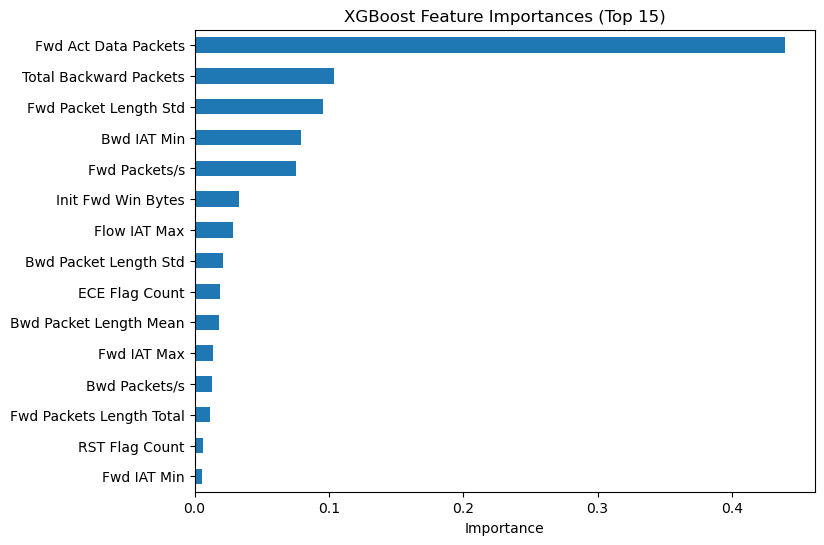

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
feat_imp.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances (Top 15)")
plt.xlabel("Importance")
plt.show()
